In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import idx2numpy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
# read dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# check shape
df.shape

(891, 12)

In [4]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# statastics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# check missing values in dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###  Preprocessing

In [7]:
# Remove unnecessary columns
df = df.drop(columns=['Ticket', 'PassengerId', 'Cabin', 'Name'])

In [8]:
# Map 'Sex' and 'Embarked' to numerical values
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [9]:
# # Create a new feature 'Family size' from the features 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [10]:
# Create a new feature 'total_member' from the features 'SibSp' and 'Parch'
df['total_member'] = df['SibSp'] + df['Parch'] + 1

In [11]:
# Fill NA in Embarked column with majority class
df['Embarked'] = df['Embarked'].fillna(2)
df['Age'] = df['Age'].fillna(df.Age.mean())

In [12]:
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
FamilySize      0
total_member    0
dtype: int64

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,total_member
0,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,2
2,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,2
4,0,3,0,35.0,0,0,8.0500,2.0,1,1


In [14]:
df.shape

(891, 10)

## Extract feature and split dataset

In [15]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [16]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=1)

## scale the data

In [17]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=df.columns[1:])
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=df.columns[1:])

X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,total_member
0,0.0,1.0,0.672598,0.0,0.0,0.050610,1.0,0.0,0.0
1,1.0,0.0,0.412087,0.0,0.0,0.015412,1.0,0.0,0.0
2,0.5,1.0,0.231317,0.0,0.0,0.020495,1.0,0.0,0.0
3,1.0,1.0,0.412087,0.0,0.0,0.015883,0.5,0.0,0.0
4,0.5,1.0,0.088968,0.0,0.4,0.051237,1.0,0.2,0.2
...,...,...,...,...,...,...,...,...,...
218,0.5,1.0,0.459075,0.0,0.4,0.050749,1.0,0.2,0.2
219,0.0,0.0,0.786477,0.0,0.0,0.051822,1.0,0.0,0.0
220,0.0,0.0,0.412087,0.0,0.0,0.058556,1.0,0.0,0.0
221,1.0,0.0,0.412087,0.0,0.0,0.014102,0.0,0.0,0.0


## Select feature

In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
sfs = SelectFromModel(model)
sfs.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [19]:
sfs.get_support()

array([ True,  True,  True, False, False, False, False, False, False])

## pclass, sex and age is best fearture for model 

In [20]:
# extract best features
X_train = X_train.iloc[:, :3]
X_test = X_test.iloc[:, :3]

## Train and predict model

In [21]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

##  plot roc curve

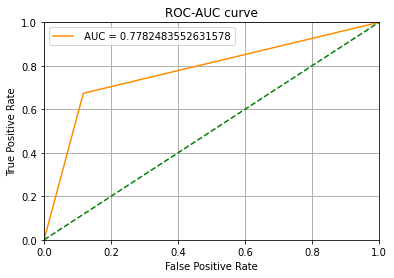

In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, c='darkorange', label=" AUC = " + str(auc(fpr, tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC curve")
plt.grid(linestyle='-', linewidth=1)
plt.show()

## Did you find this approch greedy?

yes i found out this approch to be greedy.
because its check all subset of features and check whether which sets of feaure gives best accuracy.